# **Ahmad Thoriq - 211011400083**
**UTS DATA MINING**

Import Data

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data_pelanggan.csv to data_pelanggan.csv


Deklarasi Variabel df untuk penempatan file, dan penampilan beberapa record

In [6]:
import pandas as pd
df = pd.read_csv('data_pelanggan.csv')
df.head()

,umur,pendapatan,pembelian_tahunan,loyalitas
0,58,77,6,Tidak Loyal
1,48,52,8,Tidak Loyal
2,34,91,5,Tidak Loyal
3,27,117,4,Tidak Loyal
4,40,66,2,Tidak Loyal


-------------------------------------------------------------------------

# **1. Preprocessing**

a. Ringkasan Statistik

In [7]:
print('\nRingkasan Statistik : ')
print(df.describe())


Ringkasan Statistik : 
             umur  pendapatan  pembelian_tahunan
count  100.000000  100.000000         100.000000
mean    38.790000   74.090000           6.660000
std     11.556008   26.947797           3.929222
min     20.000000   30.000000           1.000000
25%     28.000000   55.250000           3.000000
50%     39.500000   75.000000           6.000000
75%     47.250000   92.500000           9.000000
max     59.000000  119.000000          14.000000


b. Visualisasi Hubungan Antara pendapatan dan pembelian_tahunan

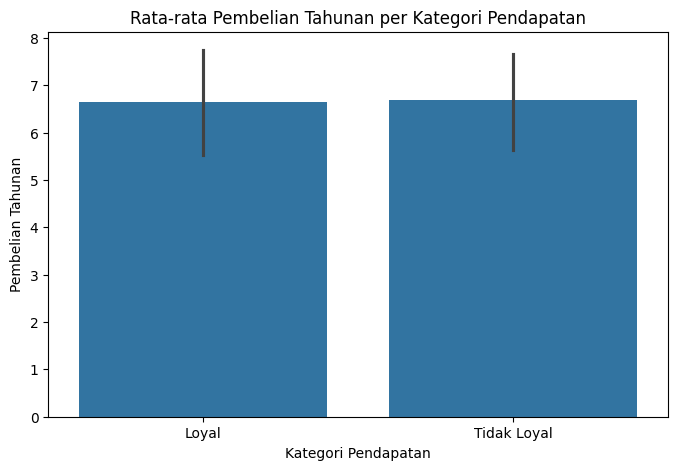

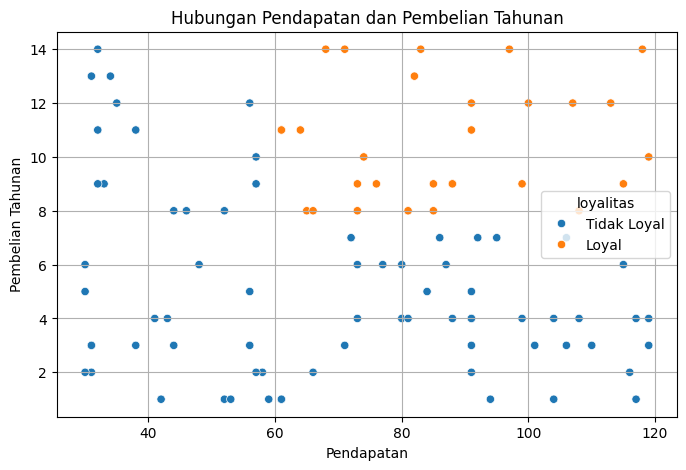

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df['kategori_pendapatan'] = pd.cut(df['pendapatan'], bins=2, labels=['Loyal', 'Tidak Loyal'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='kategori_pendapatan', y='pembelian_tahunan')
plt.title('Rata-rata Pembelian Tahunan per Kategori Pendapatan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='pendapatan', y='pembelian_tahunan', hue='loyalitas')
plt.title('Hubungan Pendapatan dan Pembelian Tahunan')
plt.xlabel('Pendapatan')
plt.ylabel('Pembelian Tahunan')
plt.grid(True)
plt.show()

-------------------------------------------------------------------------

# **2. Implementasi Algo**

**a. Decision Tree**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['loyalitas_encoded'] = le.fit_transform(df['loyalitas'])

X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nAkurasi:")
print(f"{accuracy_score(y_test, y_pred)*100:.2f}%")

Confusion Matrix:
[[ 6  0]
 [ 0 14]]

Classification Report:
              precision    recall  f1-score   support

       Loyal       1.00      1.00      1.00         6
 Tidak Loyal       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Akurasi:
100.00%


**b. K-Nearest Neighbor (KNN)**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

X = df[['umur', 'pendapatan', 'pembelian_tahunan']]
y = df['loyalitas_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))

print("\nAkurasi:")
print(f"{accuracy_score(y_test, y_pred_knn)*100:.2f}%")

Confusion Matrix:
[[ 5  1]
 [ 2 12]]

Classification Report:
              precision    recall  f1-score   support

       Loyal       0.71      0.83      0.77         6
 Tidak Loyal       0.92      0.86      0.89        14

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.83        20
weighted avg       0.86      0.85      0.85        20


Akurasi:
85.00%


------------------------------------------------------------

# **3. Analisis Perbandingan**

**a. Model Mana yang lebih akurat ?**

Model	Akurasi

- Decision Tree	100.00%
- KNN (k=5)	85.00%

**b. Apakah klasifikasi konsisten ?**

- Decision Tree menghasilkan akurasi 100% semua data terklasifikasi dengan benar (confusion matrix menunjukkan 0 kesalahan)

- K-Nearest Neighbors (KNN) menghasilkan akurasi 85% ada 3 kesalahan klasifikasi (1 Loyal salah diklasifikasi sebagai Tidak Loyal, dan 2 Tidak Loyal salah diklasifikasi sebagai Loyal)

Klasifikasi tidak konsisten, karena:

1. Hasil klasifikasi berbeda tergantung algoritma (DT vs KNN)

2. Dataset kecil meningkatkan risiko overfitting

3. Perbedaan hasil menunjukkan bahwa hasil klasifikasi tidak stabil atau belum robust

-------------------------------------------------------------------------

# **4. Kesimpulan**

Berdasarkan hasil evaluasi model, Decision Tree (DT) menghasilkan akurasi yang lebih tinggi (100%) dibandingkan dengan K-Nearest Neighbors (KNN) yang hanya menghasilkan akurasi 85%. Hal ini menunjukkan bahwa DT lebih mampu memprediksi hasil dengan lebih akurat pada dataset ini

1. Kekuatan dan Kelemahan Masing-Masing Model :

Decision Tree (DT) :

**- Kekuatan :**

    Dapat menangani data dengan banyak fitur dan klasifikasi yang kompleks

    Memberikan visualisasi pohon keputusan yang mudah dipahami

    Lebih baik pada dataset yang memiliki banyak kategori atau cabang

**- Kelemahan :**

    Cenderung mengalami overfitting jika modelnya terlalu kompleks atau jika tidak dilakukan pruning

    Lebih mudah terpengaruh oleh noise dalam data, yang bisa membuat model menjadi sangat spesifik terhadap data training

K-Nearest Neighbors (KNN):

**- Kekuatan :**

    Mudah diimplementasikan dan digunakan, cocok untuk dataset yang tidak terlalu besar dan sederhana

    Tidak memerlukan proses training panjang, hanya menyimpan data dan melakukan perhitungan jarak

**- Kelemahan :**

    Lambat pada dataset besar karena harus menghitung jarak ke semua data untuk setiap prediksi

    Kurang efektif jika data memiliki banyak fitur (karena dimensionality curse), yang membuat pengukuran jarak menjadi kurang akurat

    Cenderung kurang efektif pada data dengan banyak kategori karena kesulitan dalam memilih tetangga yang relevan

2. Faktor yang Mempengaruhi Perbedaan Kinerja :

- Jumlah Fitur : Decision Tree lebih efektif dengan banyak fitur atau kategori karena dapat memilih fitur yang paling relevan. Sedangkan KNN bisa kesulitan dengan data yang memiliki banyak fitur, karena pengukuran jarak menjadi tidak akurat saat fitur meningkat

- Jumlah Data : Decision Tree bekerja baik pada data yang lebih besar, namun bisa overfit jika data terlalu kompleks. KNN lebih cocok untuk data kecil hingga menengah karena semakin banyak data, semakin lama waktu prediksinya

- Keakuratan Model : Decision Tree secara keseluruhan lebih akurat pada dataset ini karena lebih mampu menangani banyak kategori dan variabel, sedangkan KNN lebih sensitif terhadap noise dan kesulitan dengan data yang terlalu beragam
